# Homework 6
We first import the DOB dataset and reconstruct the dataframe we used in Homework 5.

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/statds/ids-s22/main/notes/data/nyc_DobJobApp_2021.csv'
dob = pd.read_csv(url)
dob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20087 entries, 0 to 20086
Data columns (total 96 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job #                          20087 non-null  int64  
 1   Doc #                          20087 non-null  int64  
 2   Borough                        20087 non-null  object 
 3   House #                        20087 non-null  object 
 4   Street Name                    20087 non-null  object 
 5   Block                          20087 non-null  int64  
 6   Lot                            20087 non-null  int64  
 7   Bin #                          20087 non-null  int64  
 8   Job Type                       20087 non-null  object 
 9   Job Status                     20087 non-null  object 
 10  Job Status Descrp              20087 non-null  object 
 11  Latest Action Date             20087 non-null  object 
 12  Building Type                  20087 non-null 

In [3]:
dob.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,440673512,1,QUEENS,10040,222 STREET,10780,19,4231025,A2,R,...,N,NaN,A1,0,40.714365,-73.731171,27.0,568.0,Queens Village,4231025.0
1,440673497,1,QUEENS,215-02,93 AVENUE,10618,28,4226672,A2,X,...,N,NaN,A1,0,40.720067,-73.742696,23.0,542.0,Queens Village,4226672.0
2,340810947,1,BROOKLYN,770,RUGBY ROAD,6688,34,3178977,A2,R,...,N,NaN,A1,0,40.630504,-73.963353,45.0,528.0,Flatbush,3178977.0
3,340810910,1,BROOKLYN,39,RUTLAND ROAD,5034,90,3115124,A2,R,...,N,NaN,B3,0,40.658878,-73.959067,40.0,79801.0,Prospect Lefferts Gardens-Wingate,3115124.0
4,340810956,1,BROOKLYN,200,LINCOLN ROAD,5029,18,3114725,A2,X,...,N,NaN,A5,0,40.661240,-73.955847,40.0,800.0,Prospect Lefferts Gardens-Wingate,3114725.0


In [4]:
df = dob.loc[(dob["Job Type"]=="A2") & 
             (dob["Building Type"]=="1-2-3 FAMILY")][[
    "Borough","Fully Paid","Approved","GIS_LATITUDE","GIS_LONGITUDE","Total Est. Fee","Professional Cert"]]
df.columns = ["borough","entry_date","approved_date","latitude","longitude","cost_est","prof_cert"]
df["cost_est"]=pd.to_numeric([x.split("$")[1] for x in df["cost_est"]])
df["approved_date"]=pd.to_datetime(df["approved_date"])
df["entry_date"]=pd.to_datetime(df["entry_date"])
df["num_days"]=(df["approved_date"]-df["entry_date"]).dt.days

In [5]:
df.head()

,borough,entry_date,approved_date,latitude,longitude,cost_est,prof_cert,num_days
0,QUEENS,2021-05-04,2021-05-04,40.714365,-73.731171,135.2,Y,0
1,QUEENS,2021-04-28,2021-04-28,40.720067,-73.742696,231.4,Y,0
2,BROOKLYN,2021-04-28,2021-04-28,40.630504,-73.963353,267.8,Y,0
3,BROOKLYN,2021-04-28,2021-05-04,40.658878,-73.959067,210.6,N,6
4,BROOKLYN,2021-04-28,2021-05-03,40.661240,-73.955847,218.4,N,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7545 entries, 0 to 20078
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   borough        7545 non-null   object        
 1   entry_date     7545 non-null   datetime64[ns]
 2   approved_date  7545 non-null   datetime64[ns]
 3   latitude       7538 non-null   float64       
 4   longitude      7538 non-null   float64       
 5   cost_est       7545 non-null   float64       
 6   prof_cert      7539 non-null   object        
 7   num_days       7545 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 530.5+ KB


## Data Cleaning

We need to omit the `NULL` values in `prof_cert`, and convert the `prof_cert` column into boolean values.

In [7]:
df_nona = df[df["prof_cert"].notna()]
d = {'Y': True, 'N': False}
df_nona.loc[:,"prof_cert"] = df_nona.loc[:,"prof_cert"].map(d)

In [8]:
df_nona.head()

,borough,entry_date,approved_date,latitude,longitude,cost_est,prof_cert,num_days
0,QUEENS,2021-05-04,2021-05-04,40.714365,-73.731171,135.2,True,0
1,QUEENS,2021-04-28,2021-04-28,40.720067,-73.742696,231.4,True,0
2,BROOKLYN,2021-04-28,2021-04-28,40.630504,-73.963353,267.8,True,0
3,BROOKLYN,2021-04-28,2021-05-04,40.658878,-73.959067,210.6,False,6
4,BROOKLYN,2021-04-28,2021-05-03,40.661240,-73.955847,218.4,False,5


## Problem 1
First, compare the distributions of the waiting time until approval by professionally certified or not.

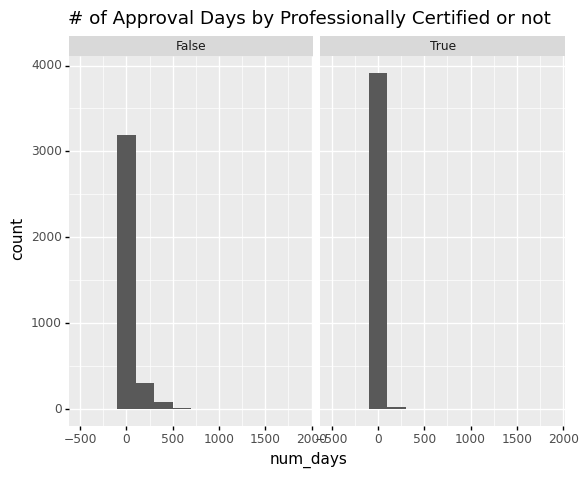

<ggplot: (333341191)>

In [9]:
(
    ggplot(df_nona, aes(x = 'num_days', y = after_stat('count')))
    + geom_histogram(binwidth = 200)
    + facet_wrap("prof_cert")
    + ggtitle("# of Approval Days by Professionally Certified or not")
)

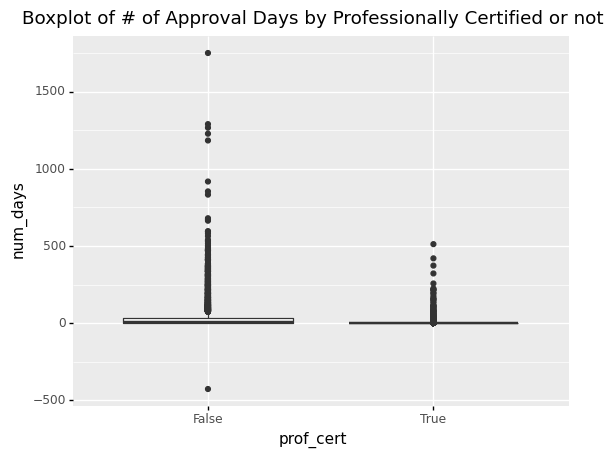

<ggplot: (333435124)>

In [10]:
(
    ggplot(df_nona, aes(x = 'prof_cert', y = 'num_days'))
    + geom_boxplot()
    + ggtitle("Boxplot of # of Approval Days by Professionally Certified or not")
)

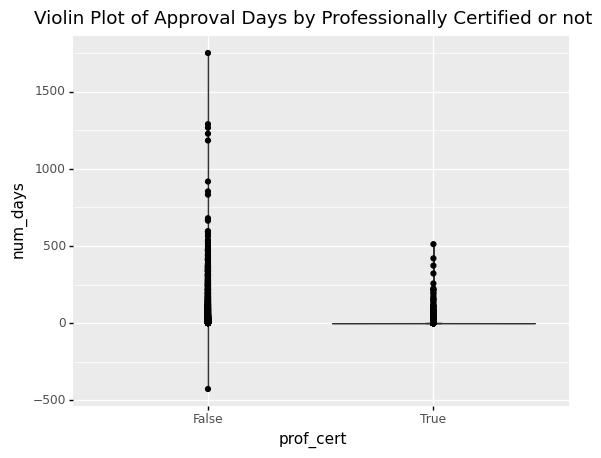

<ggplot: (333523432)>

In [11]:
(
  ggplot(df_nona, aes(x = 'prof_cert', y = 'num_days'))
  + geom_violin(df_nona)
  + geom_point()
  + ggtitle("Violin Plot of Approval Days by Professionally Certified or not")
)

We then test the independence of `prof_cert` and `num_days`.

In [12]:
print(ss.pearsonr(df_nona["prof_cert"], df_nona["num_days"]))
print(ss.spearmanr(df_nona["prof_cert"], df_nona["num_days"]))
print(ss.kendalltau(df_nona["prof_cert"], df_nona["num_days"]))

(-0.27082864368604365, 7.163013979952017e-127)
SpearmanrResult(correlation=-0.8310311090801962, pvalue=0.0)
KendalltauResult(correlation=-0.7328951304812443, pvalue=0.0)


All the p-values are pretty small, so at $\alpha = 0.05$, we reject the null hypothesis, and the waiting time until approval is not independent of whether the application was professionally certified.

## Problem 2
Again, we first compare the distributions by borough.

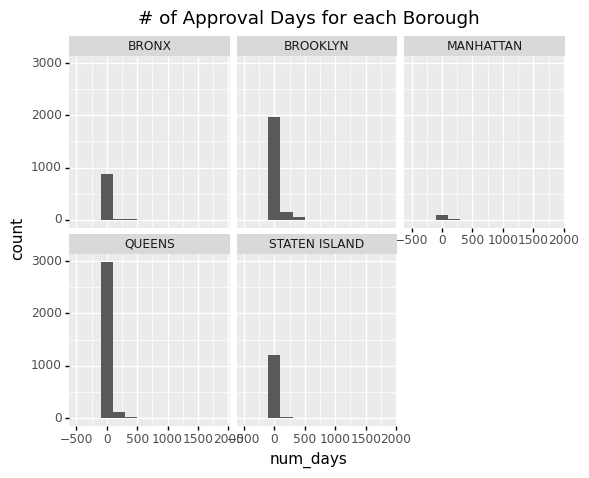

<ggplot: (333587128)>

In [13]:
(
    ggplot(df, aes(x = 'num_days', y = after_stat('count')))
    + geom_histogram(binwidth = 200)
    + facet_wrap("borough")
    + ggtitle("# of Approval Days for each Borough")
)

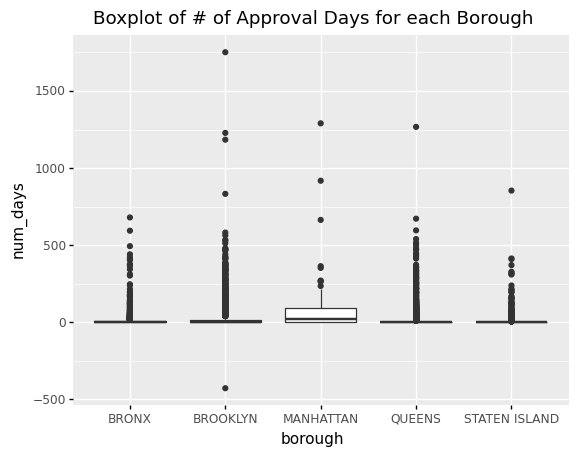

<ggplot: (333766867)>

In [14]:
(
    ggplot(df, aes(x = 'borough', y = 'num_days'))
    + geom_boxplot()
    + ggtitle("Boxplot of # of Approval Days for each Borough")
)

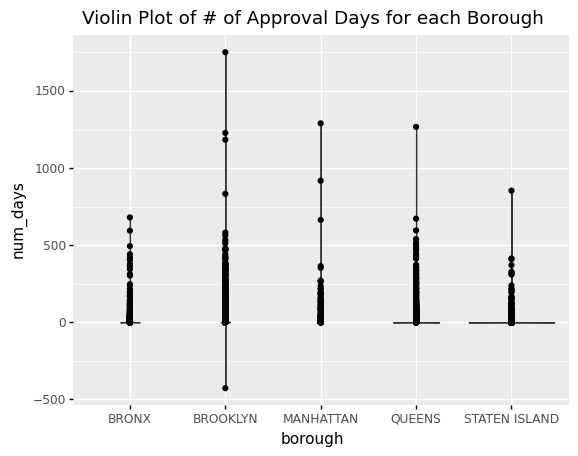

<ggplot: (333853043)>

In [15]:
(
  ggplot(df, aes(x = 'borough', y = 'num_days'))
  + geom_violin(df)
  + geom_point()
  + ggtitle("Violin Plot of # of Approval Days for each Borough")
)

To test whether the waiting times are the same across all boroughs, we need to conduct a one-way ANOVA.

In [16]:
a = df.loc[df["borough"]=="BRONX","num_days"]
b = df.loc[df["borough"]=="BROOKLYN","num_days"]
c = df.loc[df["borough"]=="MANHATTAN","num_days"]
d = df.loc[df["borough"]=="QUEENS","num_days"]
e = df.loc[df["borough"]=="STATEN ISLAND","num_days"]
ss.f_oneway(a, b, c, d, e)

F_onewayResult(statistic=48.03842142587275, pvalue=5.935728655028941e-40)

The p-values is pretty small, so at $\alpha = 0.05$, we reject the null hypothesis, and the waiting times until approval are not the same across all boroughs.

## Problem 3
We first cut the logrithms of ordered `cost_est`.

In [17]:
labels = range(5)
df["label"] = pd.qcut(np.log(df["cost_est"]), q = 5, labels = labels)

We then compare the distributions.

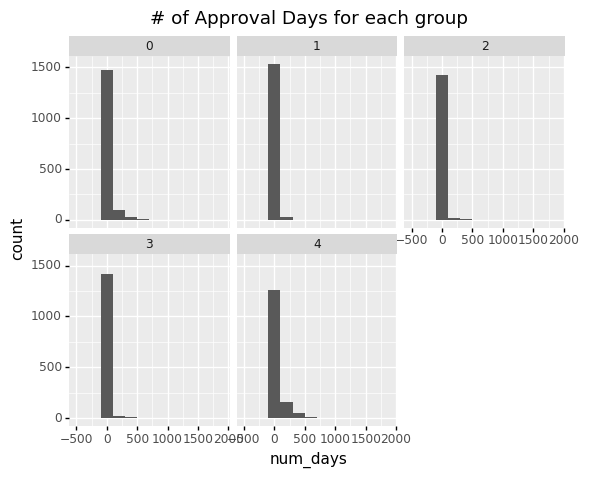

<ggplot: (333585692)>

In [18]:
(
    ggplot(df, aes(x = 'num_days', y = after_stat('count')))
    + geom_histogram(binwidth = 200)
    + facet_wrap("label")
    + ggtitle("# of Approval Days for each group")
)

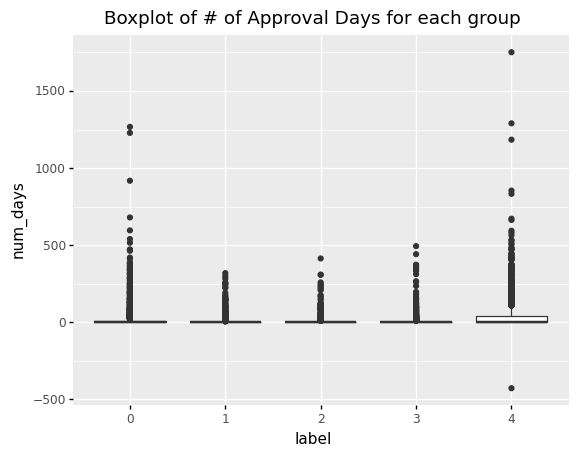

<ggplot: (334069107)>

In [19]:
(
    ggplot(df, aes(x = 'label', y = 'num_days'))
    + geom_boxplot()
    + ggtitle("Boxplot of # of Approval Days for each group")
)

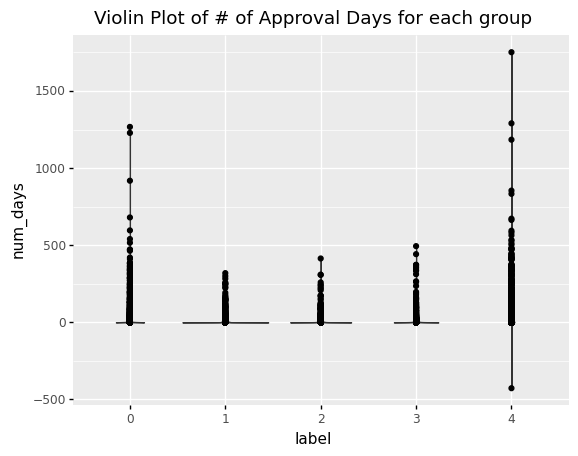

<ggplot: (334154286)>

In [20]:
(
  ggplot(df, aes(x = 'label', y = 'num_days'))
  + geom_violin(df)
  + geom_point()
  + ggtitle("Violin Plot of # of Approval Days for each group")
)

We then test the independence of `cost_est` and `num_days`.

In [21]:
print(ss.pearsonr(df["cost_est"], df["num_days"]))
print(ss.spearmanr(df["cost_est"], df["num_days"]))
print(ss.kendalltau(df["cost_est"], df["num_days"]))

(0.23589660059923906, 6.432176463616657e-96)
SpearmanrResult(correlation=0.19250584625458736, pvalue=6.672106709219014e-64)
KendalltauResult(correlation=0.14682399261969273, pvalue=5.298346888434351e-69)


All the p-values are pretty small, so at $\alpha = 0.05$, we reject the null hypothesis, and the waiting time until approval is not independent of estimated cost.

## Problem 4

In [33]:
import statsmodels.formula.api as smf

mymod = smf.rlm(formula = "num_days ~ borough + cost_est + prof_cert", data = df)
myfit = mymod.fit()
myfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               num_days   No. Observations:                 7539
Model:                            RLM   Df Residuals:                     7532
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 06 Mar 2022                                         
Time:                        22:06:30                                         
No. Iterations:                    50                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4668      0.140     -3.327      0.001      -0.742      -0.192
borough[T.BROOKLYN]          0.5447      0.149      3.658      0.000       0.253       0.837
borough[T.MANHATTAN]         6.7978      0.385     17.656      0.000       6.043       7.552
borough[T.QUEENS]            0.5551      0.142      3.914      0.000       0.277       0.833
borough[T.STATEN ISLAND]     0.0791      0.165      0.479      0.632      -0.244       0.402
prof_cert[T.Y]              -5.6662      0.091    -62.085      0.000      -5.845      -5.487
cost_est                     0.0305      0.000    143.769      0.000       0.030       0.031
============================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

The coefficient of each variable is the estimated amount of change if its corresponding covariate increases by 1 unit while others remain the same. For categorical variables, this increase represents the change of category. The intercept is the estimated waiting time if it is in Bronx and not be professionally certified. It seems that whether the application occurs in Staten Island has little impact on the waiting time.

## Problem 5
We can investigate whether the application was professionally certified or not is independent of borough. 